**Student Name:** B M Nafis Fuad

**Student ID:** 274502

#Assignment 1 (Random Forest)

* In this project you are given a dataset of housing housing price prediction. 
Dataset description is found in the given datasets.

* The goal of the project is to predict the price of a house given its attributes. 
Therefore, the problem is a regression task. 

* You need to build a random forest that consists of multiple decision trees (for regression) from the given training data set. Then, apply it on the test set and submit your code to generate predictions.
You need to build the random forest and decision trees from scratch. (I.e., it is not allowed to use existing machine learning libraries or packages such as sklearn.)

* You may use any programming language/environment of your choice, but you are required to submit the complete source code to produce the output
If you use anything other than jupyter notebook, submit an executable and run that from the main function of the jupyter notebook so that the prediction generation is automated. We can provide assistance with this.
The output (a single file with the predictions for each test instance) must be generated automatically using the approach implemented by you. Submitting predictions/code from any other source (Internet, another student, etc.) is considered cheating and will result in immediate disqualification (i.e., dismissal from the course).

##Part 1: Preprocessing and dataset analysis (20 points)

* The given dataset is quite complex, it has many attributes, and not all of them are useful! 
Training on such dataset results in a bad accuracy. And this is exactly the point! 

* "Understanding the question is half the answer". In data mining, understanding the dataset is half the answer! 

* In part 1 you need to analyze the dataset and make it clean. 
 

###Load the dataset and explore (5 points)

* Load the dataset, view the dataset and the shape of it, 

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import log
from math import sqrt

In [74]:
#Collecting Data

#Train Dataset
train_dataset_path='housing_price_train.csv'
dfhus=pd.read_csv(train_dataset_path)

#Test Dataset
test_dataset_path='housing_price_test.csv'
dfhus_test=pd.read_csv(test_dataset_path)

#Sample Dataset
sample_saleprice='sample_submission.csv'
dfhus_sample=pd.read_csv(sample_saleprice)

#Test and Sample merged Dataset
dfhus_merged=pd.merge(dfhus_test,dfhus_sample,on='Id')

In [75]:
#Viewing Train Dataset
dfhus

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [76]:
#Viewing Test Dataset
dfhus_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,3016,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
1556,3017,20,RL,75.0,7388,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1557,3018,160,FV,30.0,3180,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1558,3019,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [77]:
#Viewing Sample Dataset
dfhus_sample

,Id,SalePrice
0,1461,115000
1,1462,158000
2,1463,173000
3,1464,178000
4,1465,220000
...,...,...
1454,2915,92000
1455,2916,88000
1456,2917,137500
1457,2918,146500


In [78]:
#Viewing Test and Sample merged Dataset
dfhus_merged

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,115000
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,158000
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,173000
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,92000
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,88000
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,137500
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,146500


In [79]:
#Shape of Dataset
print("Train Dataset (Rows, Columns):", dfhus.shape)
print("Test Dataset (Rows, Columns):", dfhus_test.shape)
print("Sample Dataset (Rows, Columns):", dfhus_sample.shape)
print("Test and Sample Merged Dataset (Rows, Columns):", dfhus_merged.shape)

Train Dataset (Rows, Columns): (1460, 81)
Test Dataset (Rows, Columns): (1560, 80)
Sample Dataset (Rows, Columns): (1459, 2)
Test and Sample Merged Dataset (Rows, Columns): (1459, 81)


### Clean the dataset (10 points)

* We cannot train on a 'dirty' dataset! There are duplicated, Null, and missing values that you need to take care of!

* Drop all columns which have null values >= 70 % and drop all rows which have null values >= 70 %.

* You need to take care of categorial data!

In [80]:
#Preprocessing of Dataset
def PreprocessingData(db):
    
    #Graph function for visualization
    def graphF(db_total_ftr,db_prcntg_ftr,feature):
        #Visualization
        plt.figure(figsize=(16,5))
        #Visualizing total null values by feature
        ax1 = plt.subplot(1,2,1) 
        db_total_ftr_sorted = db_total_ftr[:25]
        sns.barplot(x=db_total_ftr_sorted.index, y=db_total_ftr_sorted, ax=ax1)
        plt.xticks(rotation='90')
        plt.xlabel('Features ({})'.format(feature), fontsize=15)
        plt.ylabel('Number of Total Null Values', fontsize=15)
        plt.title('Total Null Data by Feature ({})'.format(feature), fontsize=15)

        #Visualizing percentage null values by feature
        ax2 = plt.subplot(1,2,2)
        db_prcntg_ftr_sorted = db_prcntg_ftr[:25]
        sns.barplot(x=db_prcntg_ftr_sorted.index, y=db_prcntg_ftr_sorted, ax=ax2)
        plt.xticks(rotation='90')
        plt.xlabel('Features ({})'.format(feature), fontsize=15)
        plt.ylabel('Percentage of Null Values', fontsize=15)
        plt.title('Null Data Percentage by Feature ({})'.format(feature), fontsize=15)
        plt.show()


    #Checking Null Values in Column
    #Checking if there is any Columns with Null values >=70%
    db_percent_column=(db.isnull().sum() / len(db))*100
    print("Any COLUMN with null values >= 70%?: ", db_percent_column[db_percent_column>=70].any())
    if db_percent_column[db_percent_column>=70].any() == True:
        #Column wise Total Null Values
        db_total_col = (db.isnull().sum()).sort_values(ascending=False)
        #Column wise Percentage Null Values
        db_prcntg_col = ((db.isnull().sum() / len(db)) * 100).sort_values(ascending=False)
        #Visualization
        print("Column wise Null Values")
        graphF(db_total_col,db_prcntg_col,"Column")

        #Dropping Columns with Null values >=70%
        col_to_drop = db_percent_column[db_percent_column>=70].keys()
        db = db.drop(col_to_drop, axis=1)
        #Checking if there is anymore Column with Null values >=70% after dropping
        db_percent_column=(db.isnull().sum() / len(db))*100
        print("Anymore COLUMN with null values >= 70% after dropping?: ", db_percent_column[db_percent_column>=70].any())
    

    #Checking Null Values in Row
    #Checking if there is any Row with Null values >=70%
    db_percent_row = (db.isnull().sum(axis=1) / len(db)) * 100
    print("Any ROW with null values >= 70%?: ", db_percent_row[db_percent_row>=70].any())
    if db_percent_row[db_percent_row>=70].any() == True:
        #Row wise Total Null Values
        db_total_row = (db.isnull().sum(axis=1)).sort_values(ascending=False)
        #Row wise Percentage Null Values
        db_prcntg_row = ((db.isnull().sum(axis=1) / len(dfhus)) * 100).sort_values(ascending=False)
        #Visualization
        print("Row wise Null Values")
        graphF(db_total_row,db_prcntg_row,"Row")

        #Dropping Rows with Null values >=70%
        row_to_drop = db_percent_row[db_percent_row>=70].keys()
        db = db.drop(row_to_drop, axis=0)
        #Checking if there is anymore Row with Null values >=70% after dropping
        db_percent_row = (db.isnull().sum(axis=1) / len(db)) * 100
        print("Anymore ROW with null values >= 70% after dropping?: ", db_percent_row[db_percent_row>=70].any())
    

    #Checking for Duplicate Values
    print("Any duplicate rows in Dataset?: ", db.duplicated().any())
    #Dropping Duplicate Rows
    if db.duplicated().any() == True:
        db = db.drop_duplicates()
        print("Anymore duplicate rows in Dataset after dropping?: ", db.duplicated().any())


    #Checking for Missing Values
    print("Any Missing value in Dataset?: ", db.isna().sum().any())
    #Filling missing value with Mean and Mode for different data types
    if db.isna().sum().any() == True:
        for column in db.columns:
            if db[column].dtype == 'float64' or db[column].dtype == 'int64': 
                db[column].fillna(db[column].mean(), inplace=True)
            elif db[column].dtype == 'object':
                db[column].fillna(db[column].mode()[0],inplace=True)
        print("Anymore missing value in Dataset after filling with Mean Mode?: ", db.isna().sum().any())

    return db

Any COLUMN with null values >= 70%?:  True
Column wise Null Values


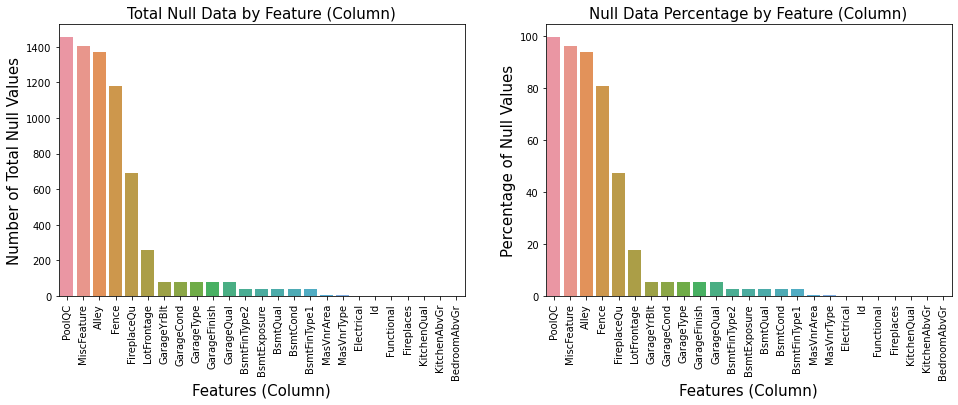

Anymore COLUMN with null values >= 70% after dropping?:  False
Any ROW with null values >= 70%?:  False
Any duplicate rows in Dataset?:  False
Any Missing value in Dataset?:  True
Anymore missing value in Dataset after filling with Mean Mode?:  False


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [81]:
dfhus = PreprocessingData(dfhus)
dfhus

Any COLUMN with null values >= 70%?:  True
Column wise Null Values


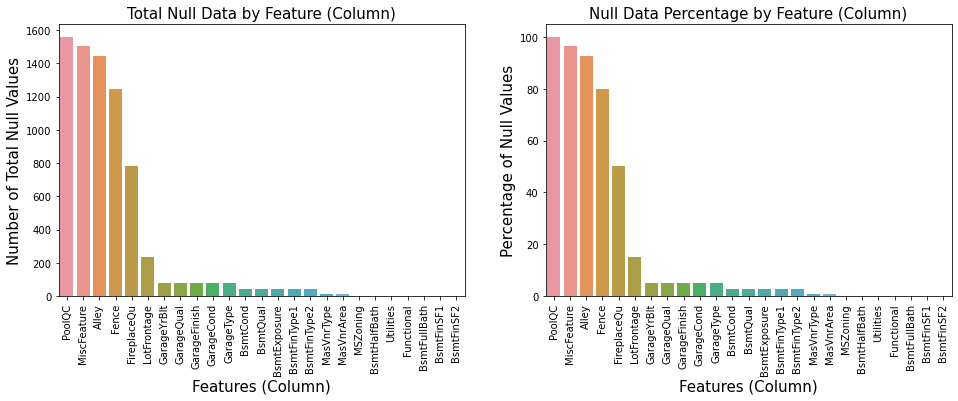

Anymore COLUMN with null values >= 70% after dropping?:  False
Any ROW with null values >= 70%?:  False
Any duplicate rows in Dataset?:  False
Any Missing value in Dataset?:  True
Anymore missing value in Dataset after filling with Mean Mode?:  False


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.00000,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.00000,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,3016,120,RL,68.73545,3196,Pave,Reg,Lvl,AllPub,Inside,...,20,0,0,0,0,0,10,2006,WD,Normal
1556,3017,20,RL,75.00000,7388,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,7,2007,WD,Normal
1557,3018,160,FV,30.00000,3180,Pave,Reg,Lvl,AllPub,Inside,...,166,0,0,0,0,0,4,2006,WD,Abnorml
1558,3019,20,RL,137.00000,16492,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,6,2010,WD,Normal


In [82]:
dfhus_test = PreprocessingData(dfhus_test)
dfhus_test

In [83]:
dfhus_sample = PreprocessingData(dfhus_sample)
dfhus_sample

Any COLUMN with null values >= 70%?:  False
Any ROW with null values >= 70%?:  False
Any duplicate rows in Dataset?:  False
Any Missing value in Dataset?:  False


,Id,SalePrice
0,1461,115000
1,1462,158000
2,1463,173000
3,1464,178000
4,1465,220000
...,...,...
1454,2915,92000
1455,2916,88000
1456,2917,137500
1457,2918,146500


Any COLUMN with null values >= 70%?:  True
Column wise Null Values


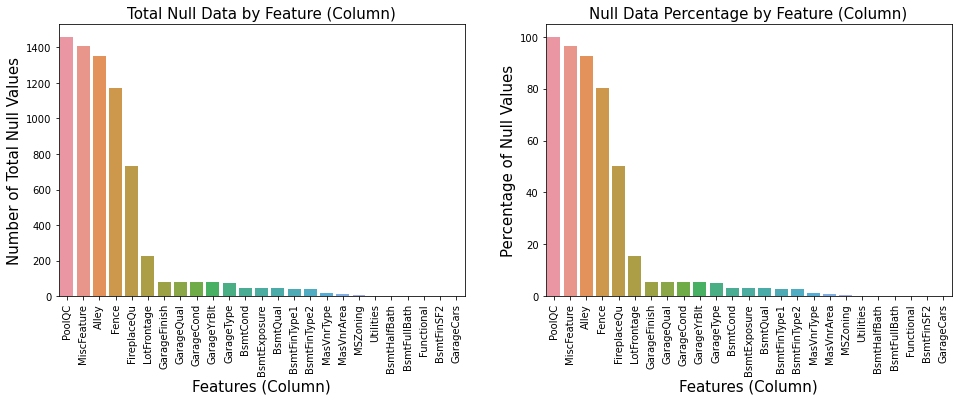

Anymore COLUMN with null values >= 70% after dropping?:  False
Any ROW with null values >= 70%?:  False
Any duplicate rows in Dataset?:  False
Any Missing value in Dataset?:  True
Anymore missing value in Dataset after filling with Mean Mode?:  False


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,115000
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,158000
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,173000
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,178000
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,92000
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,88000
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,137500
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,146500


In [84]:
dfhus_merged = PreprocessingData(dfhus_merged)
dfhus_merged

In [85]:
#Shape of Preprocessed Dataset
print("Preprocessed Train Dataset (Rows, Columns):", dfhus.shape)
print("Preprocessed Test Dataset (Rows, Columns):", dfhus_test.shape)
print("Preprocessed Sample Dataset (Rows, Columns):", dfhus_sample.shape)
print("Preprocessed Test and Sample Merged Dataset (Rows, Columns):", dfhus_merged.shape)

Preprocessed Train Dataset (Rows, Columns): (1460, 77)
Preprocessed Test Dataset (Rows, Columns): (1560, 76)
Preprocessed Sample Dataset (Rows, Columns): (1459, 2)
Preprocessed Test and Sample Merged Dataset (Rows, Columns): (1459, 77)


### Correlations! (5 points)

* Now we have a clean dataset, but not all attributes are useful! 

* Display the corrlation between all features and the sales price. This will show you which feature affects sales price more. You may use *corr()* function. 

* Choose the most correlated features, and remove others. 

In [86]:
def highCorrelationFeat(db):
    #Correlation and Heatmap of all features
    print('Correlation Between All the features')
    print(db.corr())
    plt.figure(figsize=(16,6))
    sns.heatmap(db.corr(),cmap="BuPu", annot=True)
    plt.title('Correlation Between All the features', fontsize=15)
    plt.show()

    #Showing the most correlated features based on SalePrice
    saleprice_rel_to_other = db.corrwith(db["SalePrice"]).abs()
    sorted = saleprice_rel_to_other.sort_values(ascending=False)
    most_correlatedd_feat_sorted = sorted[sorted>0.4]
    print('Features that affects SalePrice Most: ')
    print(most_correlatedd_feat_sorted)

    #Keeping only the most correlated features and removing others
    most_correlatedd_feat = saleprice_rel_to_other[saleprice_rel_to_other>0.4]
    db = db[most_correlatedd_feat.index]

    #Correlation and Heatmap of the most correlated features
    print('Correlation Between the Most correlated features')
    print(db.corr())
    plt.figure(figsize=(16,6))
    sns.heatmap(db.corr(),cmap="BuPu", annot=True)
    plt.title('Correlation Between the Most correlated features', fontsize=15)
    plt.show()

    return db

Correlation Between All the features
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.357056 -0.139781     0.032628   
LotFrontage   -0.009601   -0.357056     1.000000  0.306795     0.234196   
LotArea       -0.033226   -0.139781     0.306795  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234196  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.052820 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea    -0.050199    0.022895     0.179283  0.103960     0.410238   
BsmtFinSF1    -0.005024   -0.069836     0.215828  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.043340  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.122156 -0.002618     

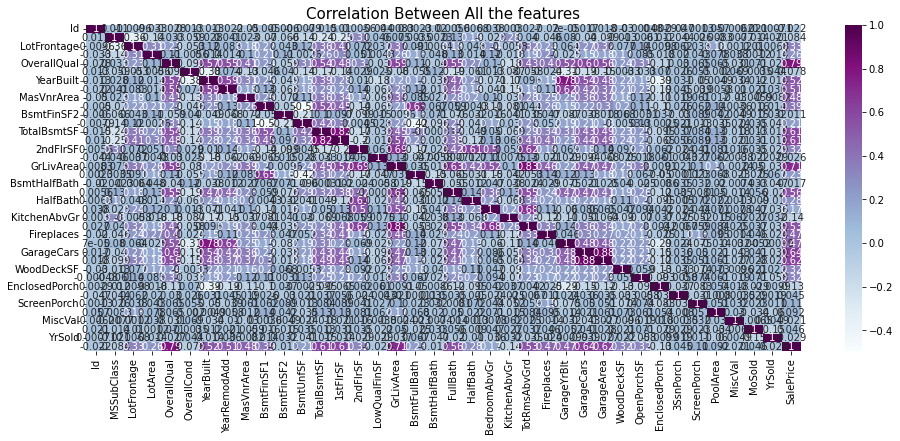

Features that affects SalePrice Most: 
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
dtype: float64
Correlation Between the Most correlated features
              OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
OverallQual      1.000000   0.572323      0.550684    0.410238     0.537808   
YearBuilt        0.572323   1.000000      0.592855    0.314745     0.391452   
YearRemodAdd     0.550684   0.592855      1.000000    0.179186     0.291066   
MasVnrArea       0.410238   0.314745      0.179186    1.000000     0.362452   
TotalBsmtSF      0.537808   0.391452      0.291066    0.362452     1.000000   
1stFlrSF         0.476224   0.281986      0.240379    0.342160     0.8195

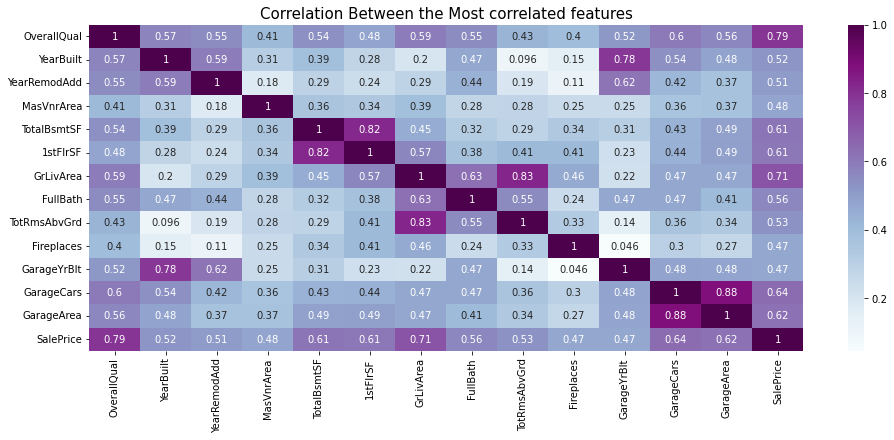

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460,175000
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500,210000
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252,266500
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240,142125


In [87]:
dfhus = highCorrelationFeat(dfhus)
dfhus

Correlation Between All the features
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004993     0.009201  0.051492    -0.064887   
MSSubClass     0.004993    1.000000    -0.425684 -0.359537     0.034690   
LotFrontage    0.009201   -0.425684     1.000000  0.538034     0.172764   
LotArea        0.051492   -0.359537     0.538034  1.000000     0.107989   
OverallQual   -0.064887    0.034690     0.172764  0.107989     1.000000   
OverallCond    0.009553   -0.071768    -0.084763 -0.103402    -0.095874   
YearBuilt     -0.058647    0.040848     0.116294  0.048314     0.621910   
YearRemodAdd  -0.079437    0.046319     0.086900  0.036907     0.591267   
MasVnrArea    -0.021347   -0.012156     0.226795  0.188338     0.451633   
BsmtFinSF1    -0.045966   -0.058760     0.190722  0.185431     0.322351   
BsmtFinSF2     0.015862   -0.079072     0.041020  0.054187    -0.028179   
BsmtUnfSF      0.001203   -0.111051     0.085123  0.071666     

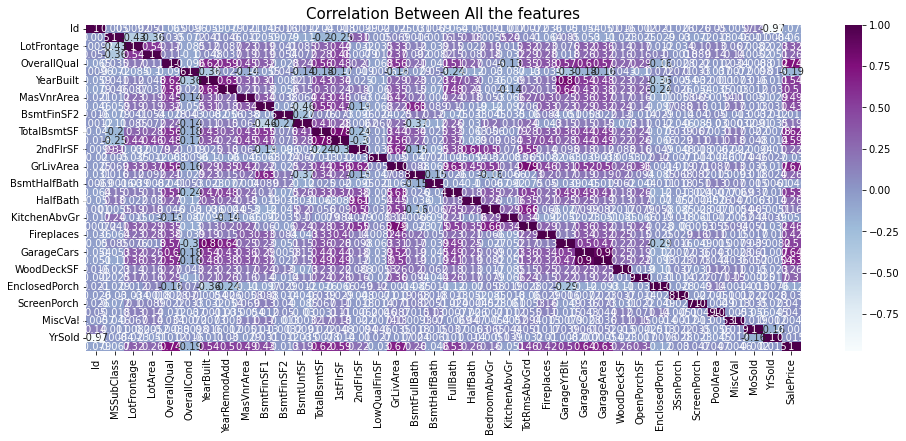

Features that affects SalePrice Most: 
SalePrice       1.000000
OverallQual     0.744516
GrLivArea       0.671445
GarageCars      0.637004
GarageArea      0.626462
TotalBsmtSF     0.620893
1stFlrSF        0.594334
YearBuilt       0.537342
FullBath        0.526217
YearRemodAdd    0.496367
GarageYrBlt     0.495643
MasVnrArea      0.490885
TotRmsAbvGrd    0.455037
BsmtFinSF1      0.425988
Fireplaces      0.416990
dtype: float64
Correlation Between the Most correlated features
              OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
OverallQual      1.000000   0.621910      0.591267    0.451633    0.322351   
YearBuilt        0.621910   1.000000      0.631696    0.310431    0.309521   
YearRemodAdd     0.591267   0.631696      1.000000    0.212778    0.175066   
MasVnrArea       0.451633   0.310431      0.212778    1.000000    0.341400   
BsmtFinSF1       0.322351   0.309521      0.175066    0.341400    1.000000   
TotalBsmtSF      0.559911   0.425345      0.304250    

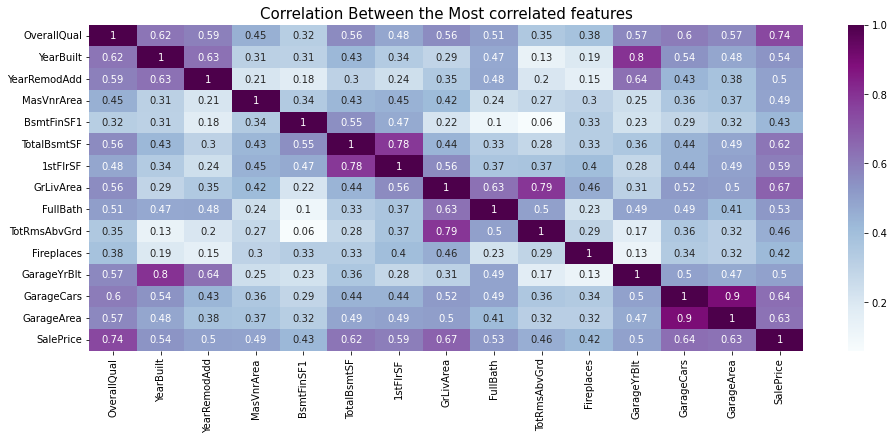

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,5,1961,1961,0.0,468.0,882.0,896,896,1,5,0,1961.000000,1.0,730.0,115000
1,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,6,0,1958.000000,1.0,312.0,158000
2,5,1997,1998,0.0,791.0,928.0,928,1629,2,6,1,1997.000000,2.0,482.0,173000
3,6,1998,1998,20.0,602.0,926.0,926,1604,2,7,1,1998.000000,2.0,470.0,178000
4,8,1992,1992,0.0,263.0,1280.0,1280,1280,2,5,0,1992.000000,2.0,506.0,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,0.0,546.0,546,1092,1,5,0,1977.721217,0.0,0.0,92000
1455,4,1970,1970,0.0,252.0,546.0,546,1092,1,6,0,1970.000000,1.0,286.0,88000
1456,5,1960,1996,0.0,1224.0,1224.0,1224,1224,1,7,1,1960.000000,2.0,576.0,137500
1457,5,1992,1992,0.0,337.0,912.0,970,970,1,6,0,1977.721217,0.0,0.0,146500


In [88]:
dfhus_merged = highCorrelationFeat(dfhus_merged)
dfhus_merged

In [89]:
# Preprocessed merged dataset has one extra column; dropping this column to adjust the column number with train dataset
dfhus_merged.drop('BsmtFinSF1', axis=1, inplace=True)
dfhus_merged

C:\Users\USER\AppData\Local\Temp\ipykernel_9708\3495724819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhus_merged.drop('BsmtFinSF1', axis=1, inplace=True)


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,5,1961,1961,0.0,882.0,896,896,1,5,0,1961.000000,1.0,730.0,115000
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,1958.000000,1.0,312.0,158000
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,1997.000000,2.0,482.0,173000
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,1998.000000,2.0,470.0,178000
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,1992.000000,2.0,506.0,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,546.0,546,1092,1,5,0,1977.721217,0.0,0.0,92000
1455,4,1970,1970,0.0,546.0,546,1092,1,6,0,1970.000000,1.0,286.0,88000
1456,5,1960,1996,0.0,1224.0,1224,1224,1,7,1,1960.000000,2.0,576.0,137500
1457,5,1992,1992,0.0,912.0,970,970,1,6,0,1977.721217,0.0,0.0,146500


## Part 2: Decision Tree (45 points)
#### Building a Decision Tree:
A Decision tree consists of nodes connected by edges. A decision tree is typically, a binary tree, which has the following properties:
- One node is marked as Root node
- Every node other than the root has a parent node
- Each node can have at most 2 child nodes (left edge & right edge)
- Leaf node is the node which contains pure data or when we reach to the maximum depth 

To create the decision tree model for scratch you need to create two classes (a class for the node, for example "class DecisionNode():" and a class for Decision Tree model, for example "class RegressionDecisionTree():")


1- DecisionNode class used to save some values for each node we do the spliting on it until we reach the leaf node
so we will save the following values for the node:
- feature: feature index.
- threshold: the value we used to split the data on.
- value: the average value for the leaf node.
- True_Branch: if the condition is true.
- False_Branch: if the condition is false.

In [90]:
class DecisionNode():
    def __init__(self, feature_idx=None, threshold=None, value=None, true_branch=None, false_branch=None):
        self.feature_idx = feature_idx      # index of the feature that is used
        self.threshold = threshold          # threshold value for feature when making the decision
        self.value = value                  # Average value if the node is a leaf in the tree
        self.true_branch = true_branch      # the node we go to if decision returns True
        self.false_branch = false_branch    # the node we go to if decision returns False

# Decision Tree Class
This Class consists the following functions:
<ol>
<li> <b>build_tree</b>: used to create the decision tree nodes</li> 
<li> <b>calc_variance_reduction</b> : measure the impurity by using variance reduction measure (like MSE) </li> 
the function takes three parameters (parentRec: the records for the target before split,and the left and right records after splitting. This function used to measure the impurity for each node and decide if we will split or not.
<li> <b>majority_vote</b>: used to calculate values for the leaf nodes records which equal to the mean of these records.</li> 
<li><b>split_by_feature</b>: this function take the feature and the threshold and check if the feature is numerical so it split the records into two node (true which is the left edge and false which is the right edge)
if the feature is categorical so it split where the values equal to the threshold</li>
<li> <b>fit</b>: Used to train the dataset after spliting the data into two part x: features, y: target</li>
<li><b>predict_value</b>: used to predict the value for each record, it is a recursive method to find the leaf node that corresponds to prediction
<li><b>predict</b>: take all records for the test data and iterate into each record to predit the y(target) value and save the result into a prediction list. 

In [91]:
class RegressionDecisionTree():
    # constructor
    def __init__(self, min_VarianceReduction=1e-7, max_depth=5):        
        self.root = None # root of this tree
        self.min_VarianceReduction = min_VarianceReduction # minimum VarianceReduction to allow splitting
        # used to stopping conductions
        self.max_depth = max_depth # maximum depth the tree grows to
 

    # used to create the decision tree nodes
    def build_tree(self, X, y, current_depth=0):
        # we will use decision dictionary to save the feature and the threshold we build the tree on 
        decision = None
        # we will use subtrees dictionary to save the feature and the threshold we build the tree on 
        subtrees = None
        largest_variance_Reduction = 0
        # add y as last column of X
        df = pd.concat((X, y), axis=1)
        n_rows, n_features = X.shape
        if current_depth <= self.max_depth:
            # iterate through every feature
            for feature_idx in range(n_features):
                # values of that column
                feature_values = X.iloc[:, feature_idx]                
                unique_values = feature_values.unique()                
                for threshold in unique_values:
                    X_trueEdge, X_falseEdge = self.split_by_feature(df, feature_idx, threshold)
                    if len(X_trueEdge) > 0 and len(X_falseEdge) > 0:
                        y_true = X_trueEdge.iloc[:,-1]
                        y_false = X_falseEdge.iloc[:,-1]                        
                        # Calculate impurity
                        VarianceRed = self.Calc_variance_reduction(y, y_true, y_false)
                        # Keep track of which feature gave the largest information gain
                        if VarianceRed > largest_variance_Reduction:
                            largest_variance_Reduction = VarianceRed
                            decision = {"feature_idx":feature_idx, "threshold":threshold}
                            subtrees = {"X_true":X_trueEdge.iloc[:,:-1],
                                        "y_true":y_true,
                                        "X_false":X_falseEdge.iloc[:,:-1],
                                        "y_false":y_false}

        # we will construct new branch of tree if the variance_Reduction is larger than minimum variance_Reduction that we've defined
        if largest_variance_Reduction > self.min_VarianceReduction:
            true_branch = self.build_tree(subtrees["X_true"], subtrees["y_true"], current_depth+1)
            false_branch = self.build_tree(subtrees["X_false"], subtrees["y_false"], current_depth+1)
            return DecisionNode(feature_idx=decision["feature_idx"], threshold=decision["threshold"], true_branch=true_branch, false_branch=false_branch)

        # at leaf node we calculate the mean for the records
        leaf_value = self.majority_vote(y)
        return DecisionNode(value=leaf_value)
                        
    # measure the impurity by using variance reduction measure (like MSE)
    # left_edgeRec= True edge: where condition is true
    # Right_edgeRec= False edge: where condition is false
    def Calc_variance_reduction(self, parentRec, left_edgeRec, Right_edgeRec):   
        # return the VarReduction = variance for parent - (Weight * var(leftEdge) + Weight * var(RightEdge)    
        # TODO
        left_weight = len(left_edgeRec)/len(parentRec)
        right_weight = len(Right_edgeRec)/len(parentRec)
        varReduction = np.var(parentRec) - ((left_weight*np.var(left_edgeRec))+(right_weight*np.var(Right_edgeRec)))
        return (varReduction)
        
    
    def majority_vote(self, Y): 
        # return the majority_vote for the leaf nodes 
        # TODO
        return np.mean(Y)  
             
    def split_by_feature(self, db, feature_idx, threshold):
        # TODO
        # split the data into left_edge & right_edge depends one specified feature and the threshold
        # return left & right edges
        # if the feature is numerical
        if isinstance(threshold, int) or isinstance(threshold, float):
            X_true = db[db.iloc[:,feature_idx] >= threshold]
            X_false = db[db.iloc[:,feature_idx] < threshold]
        # if the feature is categorical
        else:
            X_true = db[db.iloc[:,feature_idx] == threshold]
            X_false = db[~db.iloc[:,feature_idx] == threshold]
            
        return X_true, X_false
    
    # Used to train the dataset after spliting the data into x: features, y: target
    def fit(self, X, y):
        self.root = self.build_tree(X, y)


    def predict_value(self, xTest, tree=None):
        # recursive method to find the leaf node that corresponds to prediction
        # TODO
        if tree is None:
            tree = self.root
        if tree.value is not None:
            return tree.value
        feature_value = xTest[tree.feature_idx]
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch
        return self.predict_value(xTest, branch)
        #pass

    # to predict the value we need to pass the all records for features and we save the prediction for each records into a list
    def predict(self, XTest):
        y_pred = []
        for idx, row in XTest.iterrows():           
            y_pred.append(self.predict_value(row.values))
        return y_pred

- To Check the Accuracy for our prediction we use CalcAccuracy function which take the actual values for the test dataset and the predicted values and apply the RMSE formula.

In [92]:
def CalcAccuracy(Actual_Y, Predicted_y):
    # TODO
    # Calculate the difference between actual and predicted values
    prediction_variance = Actual_Y - Predicted_y
    # Calculate the mean squared error (MSE) of prediction_variance
    mse_pv = np.sum(np.square(prediction_variance))
    # Calculate the mean squared error (MSE) of Actual_Y
    mse_aY = np.sum(np.square((Actual_Y)))
    # Accuracy
    accuracy_prediction=1-(mse_pv/mse_aY)

    return accuracy_prediction

- Build decision tree model
- Fit the model
- Predict the values from test data 

In [93]:
#Feature Values from Train Dataset
dfhus.iloc[:,:-1]

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240


In [94]:
#Target Value of Train Dataset
dfhus.iloc[:,-1]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [95]:
#Building Decision Tree Model
dcsn_tree = RegressionDecisionTree()
#Fit the model
dcsn_tree.fit(dfhus.iloc[:,:-1], dfhus.iloc[:,-1])
#Predicting the values based on test dataset
dcsn_tree_predict = dcsn_tree.predict(dfhus_merged.iloc[:,:-1])
dcsn_tree_predict

[138561.64814814815,
 157355.95620437956,
 194116.35408560312,
 194116.35408560312,
 224431.81818181818,
 224431.81818181818,
 224431.81818181818,
 194116.35408560312,
 171022.4705882353,
 154115.99122807017,
 194116.35408560312,
 172902.0,
 228449.42,
 154115.99122807017,
 154115.99122807017,
 301794.71428571426,
 330345.6666666667,
 330851.12,
 296743.73170731706,
 330851.12,
 263435.71428571426,
 275745.375,
 194116.35408560312,
 213291.66666666666,
 194116.35408560312,
 194116.35408560312,
 194116.35408560312,
 296743.73170731706,
 236637.6,
 194116.35408560312,
 194116.35408560312,
 128113.82142857143,
 157355.95620437956,
 228449.42,
 190812.5,
 194116.35408560312,
 194116.35408560312,
 194116.35408560312,
 194116.35408560312,
 352521.28571428574,
 207500.0,
 194116.35408560312,
 236637.6,
 194116.35408560312,
 194116.35408560312,
 157355.95620437956,
 224431.81818181818,
 154115.99122807017,
 154115.99122807017,
 157355.95620437956,
 138561.64814814815,
 157355.95620437956,
 138

In [96]:
CalcAccuracy((dfhus_merged.iloc[:,-1]),dcsn_tree_predict)

0.9075907878655608

## Part 3: Random Forest (20 points)
#### Random forest class
- the Class consist of the following functions:
<ul>
    <li>Constructor: consists of the subset data (Training & Testing) dataset after preprocessing and a list of deciceion tree objects </li>    
    <li>Subsampling: Bagging we will take random sample with replacement for the Training dataset </li>
    <li>build_model: first make subsample for the training dataset, then split the data into featurespart(X) and targetpart(Y), then take 10 samples of the feature part, finally build the decision tree (fit), this function take the number of DT that we want to build</li>
    <li>predict: take the test dataset and make the prediction for the target field in all the tree in the random forest then take the mean for the prediction in each tree, finally add the mean of prediction to a list of predition </li>

</ul>

In [97]:
class RF(object):
    def __init__(self):
        self.Traindata = None  # training data set (loaded into memory)
        self.Testdata = None  # Test data set for prediction        
        self.trees = []  # list of decision trees 
          

     # This function generate a subsample with replacement
    def __subsampling(self, train_set, sample_size_ratio):
        #sample_number = round(len(train_set) * sample_size_ratio)
        #return  train_set.sample(n = sample_number, replace=True)
        # TODO       
        sample_number = round(len(train_set) * sample_size_ratio)    
        return train_set.sample(sample_number, replace=True)
        
        
        
    def build_model(self,train_set,sample_size_ratio,number_of_trees):
        for i in range(number_of_trees):
            TrainingSample = self.__subsampling(train_set, sample_size_ratio)
            # TODO
            X=TrainingSample.iloc[:,:-1]
            y=TrainingSample.iloc[:,-1]
            # build a  tree
            reg_tree = RegressionDecisionTree()
            # Train the tree
            reg_tree.fit(X,y)
            # Add the tree to the Treeslist
            self.trees.append(reg_tree)
        

    def predict(self, test_set):
        # TODO
        # Predict for each item in the list 
        predictions = []
        for tree in self.trees:
            predictions.append(tree.predict(test_set))
        # Calculate the mean 
        return np.mean(predictions, axis=0)
   

### Create Random Forest

* Create 10 Decision Tree in the randomforest
* Train the random forest with the dataset
* Use the created random forest to predict the test dataset 

In [98]:
# Creating 10 decision tree in Random Forest
rf_obj=RF()
rf_obj.build_model(train_set=dfhus, sample_size_ratio=0.8, number_of_trees=10)

In [99]:
rndm_forest_predict=rf_obj.predict(dfhus_merged.iloc[:,:-1])

In [100]:
own_rf_accuracy = CalcAccuracy((dfhus_merged.iloc[:,-1]),rndm_forest_predict)
own_rf_accuracy

0.9088977907209542

##Part4: Comparison! (15 points)

Now that you have finished implementing your Random Forest, it's time for some experiments and analysis! 

* Use the Random Forest in the scikit-learn library and train it on the same dataset. 

* Compare the accuracy given by your Random Forest to the scikit-learn one. 

* Increase the number of trees in your Random Forest. Does it improve the accuracy? 

* Make a table for comparing your Random Forest accuracy with different number of trees with the scikit-learn one. What is your conclusion? 

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf_model=RandomForestRegressor(n_estimators=10,random_state=0)
rf_model.fit(dfhus.iloc[:,:-1], dfhus.iloc[:,-1])
rf_model_predict=rf_model.predict(dfhus_merged.iloc[:,:-1])
scikit_accuracy=CalcAccuracy(dfhus_merged.iloc[:,-1], rf_model_predict)
scikit_accuracy

0.9600250889101232

In [103]:
#Comparison
print('Randomforest Model Accuracy: {:.16f}' .format(own_rf_accuracy))
print('Scikit-learn Model Accuracy: {:.16f}' .format(scikit_accuracy))
if (own_rf_accuracy>scikit_accuracy):
    print("Our Randomforest Model has more accuracy!")
else:
    print("Scikit-learn Model has more accuracy!")

Randomforest Model Accuracy: 0.9088977907209542
Scikit-learn Model Accuracy: 0.9600250889101232
Scikit-learn Model has more accuracy!


In [104]:
#Increasing the number of trees in my own Randomforest Model

#Randomforest Model For 20 Trees
rf_obj.build_model(train_set=dfhus, sample_size_ratio=0.8, number_of_trees=20)
rndm_forest_predict20=rf_obj.predict(dfhus_merged.iloc[:,:-1])
own_rf_accuracy20 = CalcAccuracy((dfhus_merged.iloc[:,-1]),rndm_forest_predict20)
print('Randomforest Model Accuracy for 20 Trees: {:.16f}' .format(own_rf_accuracy20))

#Scikit Model For 20 Trees
rf_model=RandomForestRegressor(n_estimators=20,random_state=0)
rf_model.fit(dfhus.iloc[:,:-1], dfhus.iloc[:,-1])
rf_model_predict20=rf_model.predict(dfhus_merged.iloc[:,:-1])
scikit_accuracy20=CalcAccuracy(dfhus_merged.iloc[:,-1], rf_model_predict20)
print('Scikit-learn Model Accuracy for 20 Trees: {:.16f}' .format(scikit_accuracy20))

Randomforest Model Accuracy for 20 Trees: 0.9106474912804842
Scikit-learn Model Accuracy for 20 Trees: 0.9607177732239446


In [105]:
#Randomforest Model For 30 Trees
rf_obj.build_model(train_set=dfhus, sample_size_ratio=0.8, number_of_trees=30)
rndm_forest_predict30 = rf_obj.predict(dfhus_merged.iloc[:,:-1])
own_rf_accuracy30 = CalcAccuracy((dfhus_merged.iloc[:,-1]),rndm_forest_predict30)
print('Randomforest Model Accuracy for 30 Trees: {:.16f}' .format(own_rf_accuracy30))

#Scikit Model For 30 Trees
rf_model=RandomForestRegressor(n_estimators=30,random_state=0)
rf_model.fit(dfhus.iloc[:,:-1], dfhus.iloc[:,-1])
rf_model_predict30=rf_model.predict(dfhus_merged.iloc[:,:-1])
scikit_accuracy30=CalcAccuracy(dfhus_merged.iloc[:,-1], rf_model_predict30)
print('Scikit-learn Model Accuracy for 30 Trees: {:.16f}' .format(scikit_accuracy30))

Randomforest Model Accuracy for 30 Trees: 0.9120764454070029
Scikit-learn Model Accuracy for 30 Trees: 0.9617225641628524


In [106]:
#Randomforest Model For 40 Trees
rf_obj.build_model(train_set=dfhus, sample_size_ratio=0.8, number_of_trees=40)
rndm_forest_predict40 = rf_obj.predict(dfhus_merged.iloc[:,:-1])
own_rf_accuracy40 = CalcAccuracy((dfhus_merged.iloc[:,-1]),rndm_forest_predict40)
print('Randomforest Model Accuracy for 40 Trees: {:.16f}' .format(own_rf_accuracy40))

#Scikit Model For 30 Trees
rf_model=RandomForestRegressor(n_estimators=40,random_state=0)
rf_model.fit(dfhus.iloc[:,:-1], dfhus.iloc[:,-1])
rf_model_predict40=rf_model.predict(dfhus_merged.iloc[:,:-1])
scikit_accuracy40=CalcAccuracy(dfhus_merged.iloc[:,-1], rf_model_predict40)
print('Scikit-learn Model Accuracy for 40 Trees: {:.16f}' .format(scikit_accuracy40))

Randomforest Model Accuracy for 40 Trees: 0.9125117543682294
Scikit-learn Model Accuracy for 40 Trees: 0.9624888704079441


In [107]:
# Comparison Table

number_of_trees = [10, 20, 30, 40]
own_rf_accuracy_t = [own_rf_accuracy, own_rf_accuracy20, own_rf_accuracy30, own_rf_accuracy40]
scikit_accuracy_t = [scikit_accuracy, scikit_accuracy20, scikit_accuracy30, scikit_accuracy40]

data = {'Number of Trees': number_of_trees, 'RandomForest Accuracy': own_rf_accuracy_t, 'scikit-learn Accuracy': scikit_accuracy_t}
df = pd.DataFrame(data)

print(df)

   Number of Trees  RandomForest Accuracy  scikit-learn Accuracy
0               10               0.908898               0.960025
1               20               0.910647               0.960718
2               30               0.912076               0.961723
3               40               0.912512               0.962489


### Conclusion

With the increase of number of trees, the accuracy increaases. But as we increase the number of trees, computational time also increases.